In [1]:
import tensorflow as tf
tf.keras.utils.get_file('cats_and_dogs_filtered.zip',"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")

'C:\\Users\\Yogesh\\.keras\\datasets\\cats_and_dogs_filtered.zip'

In [2]:
import os
import zipfile #to handle zip file

local_zip = 'C:\\Users\\Yogesh\\.keras\\datasets\\cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [4]:
std_normalize = transforms.Normalize(mean=[0, 0, 0],std=[1, 1, 1])

In [5]:
trans_train = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])
trans_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])

In [6]:
train_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/train',transform=trans_train)

In [7]:
train_dataset.classes

['cats', 'dogs']

In [8]:
test_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/validation',transform=trans_test)

In [9]:
batch_size = 8

In [10]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0, 0, 0], std=[1, 1, 1])
           )

In [11]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: cats_and_dogs_filtered/validation
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0, 0, 0], std=[1, 1, 1])
           )

In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [13]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [14]:
examples = iter(train_loader)
samples ,labels = examples.next()
print(samples.shape)
labels

torch.Size([8, 3, 224, 224])


tensor([1, 1, 1, 0, 0, 0, 0, 0])

In [15]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [16]:
sample_plot = samples[0:16]
label_plot = labels[0:16]

In [17]:
out = torchvision.utils.make_grid(sample_plot)

In [18]:
class_name = train_dataset.classes

In [19]:
class_name

['cats', 'dogs']

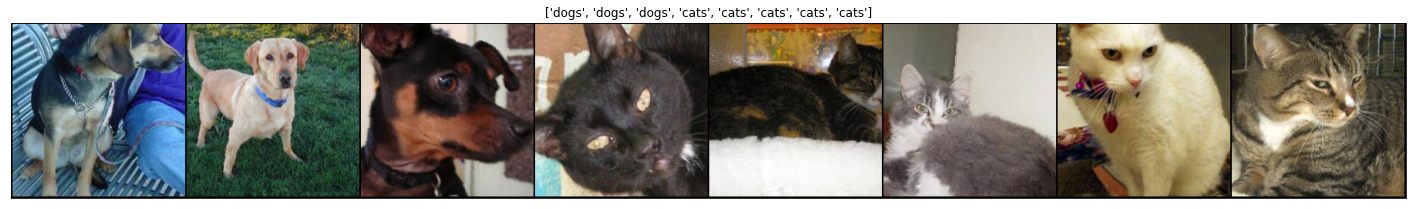

In [20]:
imshow(out,title=[class_name[x] for x in label_plot])

In [21]:
model = nn.Sequential(
nn.Conv2d(3,32,5,padding=1),#222
nn.ReLU(),
nn.MaxPool2d(2,2),#111
#nn.Dropout(0.2),
nn.Conv2d(32,64,5,padding=1),#109
nn.ReLU(),
nn.MaxPool2d(2,2),#54
#nn.Dropout(0.2),
nn.Conv2d(64,128,5,padding=1),#52
nn.ReLU(),
nn.MaxPool2d(2,2),#26
#nn.Dropout(0.2),
nn.Flatten(),
nn.Linear(26*26*128,512),
nn.ReLU(),    
#nn.Dropout(0.2),
nn.Linear(512,1),
nn.Sigmoid())

In [22]:

model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=86528, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=1, bias=True)
  (13): Sigmoid()
)

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
model = model.to(device)

In [25]:
from torch.nn.modules.loss import BCEWithLogitsLoss
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
#model.to(device)

In [26]:
#Train the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch:1,loss=0.693250298500061
epoch:1,loss=3.2020998001098633
epoch:1,loss=1.1899404525756836
epoch:1,loss=0.7694328427314758
epoch:1,loss=0.6935231685638428
epoch:1,loss=0.6812596321105957
epoch:1,loss=0.665177583694458
epoch:1,loss=0.7041637301445007
epoch:1,loss=0.8157735466957092
epoch:1,loss=0.7385930418968201
epoch:1,loss=0.6647375226020813
epoch:1,loss=0.7056128978729248
epoch:1,loss=0.6866322755813599
epoch:1,loss=0.7022671699523926
epoch:1,loss=0.6893119812011719
epoch:1,loss=0.6888355612754822
epoch:1,loss=0.6975324153900146
epoch:1,loss=0.6898395419120789
epoch:1,loss=0.6950618028640747
epoch:1,loss=0.693122923374176
epoch:1,loss=0.6914107799530029
epoch:1,loss=0.6933046579360962
epoch:1,loss=0.698767900466919
epoch:1,loss=0.6920541524887085
epoch:1,loss=0.6922393441200256
epoch:1,loss=0.6930351853370667
epoch:1,loss=0.6909274458885193
epoch:1,loss=0.6903741359710693
epoch:1,loss=0.6932815313339233
epoch:1,loss=0.6925908923149109
epoch:1,loss=0.6935402154922485
epoch:1,loss

tensor([[0.5045],
        [0.5045],
        [0.5045],
        [0.5045],
        [0.5045],
        [0.5045],
        [0.5045],
        [0.5045]], grad_fn=<SigmoidBackward0>)
1
1
1
1
1
1
1
1


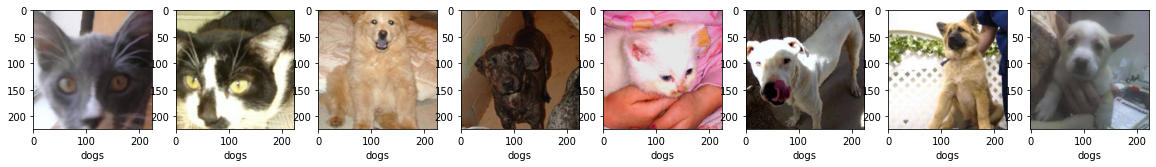

In [27]:
import numpy as np
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                         batch_size=batch_size, 
                         shuffle=True)

for features, targets in test_loader:
    break
    

predictions = model(features[:8].to(device))
#print(predictions)
#predictions = int(predictions)
d = test_dataset.classes
#print(d)
print(predictions)
fig, ax = plt.subplots(1, 8, figsize=(20, 10))
for i in range(8):
    img = features[i]
    ax[i].imshow(np.transpose(img, (1, 2, 0)))
    ax[i].set_xlabel(d[int(np.array(predictions[i].item()).round())])
    print(int(np.array(predictions[i].item()).round()))

plt.show()

In [28]:
test = samples[4].view(1,3,224,224)
test = test.to(device)
out = model(test)

In [29]:
out.item()

0.5045477151870728